<a href="https://colab.research.google.com/github/gisalgs/notebooks/blob/main/point-in-polygon-2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Point-in-Polygon: Even-odd Algorithm

Point-in-polygon is a crucial operation when we handle spatial data. For example, if we click on a polygon in QGIS, we want to quickly pull out the data about this polygon (instead of waiting for a while before the data shows up). There are many ways to determine whether a point is in a polygon and we introduce the even-odd algorithm here. To determine if a point (such as one of the dots in following figure) is in a polygon, we first draw a half line that starts from the point and points to the right of the point. If the half line intersects with the polygon in an odd number of times, then we say the point is in the polygon. Otherwise the point is outside the polygon. 

![](figures/pip-1.png)

This seemingly simple algorithm, however, has many special cases that are tedious and must be addressed. For example, the half line *a* in the figure has a part of the polygon boundary on it and we will have to decide how many times the half lines intersects the polygon. Also, when a half line (e.g., *b* and *c*) goes through a vertex of the polygon, how many times should we count the intersection?

The next consideration is the calculation of intersection points. Computing the physical intersection point, if any, is an expensive process -- it takes some time to do and it takes a lot of times if we have a lot of intersection points to compute. To understand this, we should remember the so called polygon in GIS has many line segments and we will have to test whether each of the line segments intersects with the half line. That sounds a lot. But the good news is: we don't have to get the physical intersection point for most of the cases. For many cases, we just need to make a quick decision whether the half line intersects with the boundary. We can illustrate this using the following figure. 

![](figures/pip-2.png)

In the above figure, it is clear that the half line (the one starts at point *A*) is not going to intersect with line segments *a*, *d*, and *e*. Line segment *c* crosses the half line, but we don't need to compute the intersection point --- we know for fact they will intersect because the two end points of *c* are on the different sides of the half line, and are to the right of point *A*. Taking out these cases, we only have one case left: line segments like *b* or *b'* where the two end points are on both sizes of the half line but one of the end point is to the left of point *A*. 

Then we need to consider a few **special cases**, when the point (dark dot below) is on one of the two ends of the line segment, or on a horizontal or vertical line.

![](figures/point-in-polygon-special-cases.png)

In this tutorial, we are not going to discuss the details of calculating intersection of two line segments. Please refer to sections 2.5 and 2.6 in the *GIS Algorithms* book for those details. 

To run the code in this tutorial in a Jupyter notebook on Google Colab, we need to make sure the following line is executed to load the modules.

In [1]:
!git clone https://github.com/gisalgs/geom.git 

fatal: destination path 'geom' already exists and is not an empty directory.


To run the code here on a local Python interactive mode, we need to download the necessary files into the proper folder and then do something like this:

```python
import sys
sys.path.append('/home/xiao/lib/gisalgs')
```

More detail about the even-odd algorithm for checking if a point is in a polygon can be found in Section 2.7 of the textbook. The source code is saved as a module in [point_in_polygon.py](https://github.com/gisalgs/geom/blob/master/point_in_polygon.py). This code was adopted from the C program in Graphics Gems IV by Haines (1994). The function takes two inputs: a point and a polygon. The polygon is organized as a list of Point objects. The code will raise an error if the polygon is not closed. 



In [2]:
from geom.point import *
from geom.point_in_polygon import *

points1 = [ [0,10], [5,0], [10,10], [15,0], [20,10],
           [25,0], [30,20], [40,20], [45,0], [60, 50], [50,50],
           [40,40], [30,50], [25,20], [20,50], [15,10],
           [10,50], [8, 8], [4,50], [0,10] ]
polygon1 = [ Point(p[0], p[1]) for p in points1 ]

p1 = Point(10, 30)
p2 = Point(10, 20)
p3 = Point(20, 40)
p4 = Point(5, 40)
p5 = Point(35, 20)
p6 = Point(55, 50)
p7 = Point(5, 39.5)

print("Point %s is %s"%(p1, 'IN' if pip_cross(p1, polygon1)[0] is True else 'OUT'))
print("Point %s is %s"%(p2, 'IN' if pip_cross(p2, polygon1)[0] is True else 'OUT'))
print("Point %s is %s"%(p3, 'IN' if pip_cross(p3, polygon1)[0] is True else 'OUT'))
print("Point %s is %s"%(p4, 'IN' if pip_cross(p4, polygon1)[0] is True else 'OUT'))
print("Point %s is %s"%(p5, 'IN' if pip_cross(p5, polygon1)[0] is True else 'OUT'))
print("Point %s is %s"%(p6, 'IN' if pip_cross(p6, polygon1)[0] is True else 'OUT'))
print("Point %s is %s"%(p7, 'IN' if pip_cross(p7, polygon1)[0] is True else 'OUT'))

points2 = [ [0,10], [5,0], [10,10], [15,0], [20,10] ]
polygon2 = [[Point(p[0], p[1]) for p in points2 ]]

try:
    print("Point %s is %s"%(p1, 'IN' if pip_cross(p1, polygon2)[0] is True else 'OUT'))
except Exception as err:
    print(err)

Point (10, 30) is IN
Point (10, 20) is IN
Point (20, 40) is IN
Point (5, 40) is OUT
Point (35, 20) is IN
Point (55, 50) is IN
Point (5, 39.5) is IN
Point (10, 30) is OUT


The `print` statements above are a little clumsy. We can use the `lambda` function in python to quckly define a function that will then be used to print out info. Lambda functions are special in Python. They are one-liners and are extremely useful in the situation when our function is needed for convenience. W3School has a quick intro at [here](https://www.w3schools.com/python/python_lambda.asp).

In [3]:
report = lambda res: 'IN' if res == True else 'OUT'

The above lambda function is equivalent to this:

```python
def report(res):
    if res == True:
        return 'IN'
    return 'OUT'
```

There pros and cons, but it is clear the lambda functions are meant for simplicity (in style).

In [4]:
print("Point %s is %s"%(p4, report(pip_cross(p4, polygon1)[0]))) 

Point (5, 40) is OUT


Here is a visual proof of the above results.

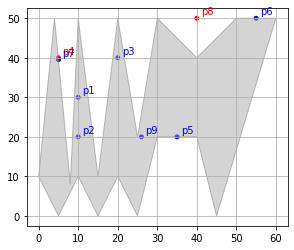

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

_, ax = plt.subplots()
line1 = [ [p.x, p.y] for p in polygon1 ]
pg1 = plt.Polygon(line1, closed=True, fill=True, 
                  facecolor='#AAAAAA', edgecolor='grey', alpha=0.5)
ax.add_patch(pg1)

p8 = Point(40, 50)
p9 = Point(26, 20)
pts = [p1, p2, p3, p4, p5, p6, p7, p8, p9]

report01 = lambda res: 1 if res is True else 0
results = [report01(pip_cross(p, polygon1)[0]) for p in pts]

colors = [['red', 'blue'][i] for i in results]
l2 = plt.scatter([p.x for p in pts], [p.y for p in pts], color=colors, s=15)
labels = ['p%s'%(i+1) for i in range(len(pts))]
for i, p in enumerate(pts):
    ax.text(p.x+1, p.y+1, labels[i], color=colors[i])
  
ax.set_aspect(1)
ax.grid()


plt.show()

Here are some more examples to examine how the algorithm works (or if it works).

In [6]:
points2 = [ [0,10], [10,10], [10,0], [0,0], [0,10] ]
polygon2 = [ Point(p[0], p[1]) for p in points2 ]

p1 = Point(0, 0)
p2 = Point(0, 5)
p3 = Point(0, 10)
p4 = Point(1, 10)
p5 = Point(8, 10)
p6 = Point(10, 10)
p7 = Point(10, 9)
p8 = Point(10, 0)
p9 = Point(9, 0)
p10 = Point(1, 0)
p11 = Point(-1, 0)

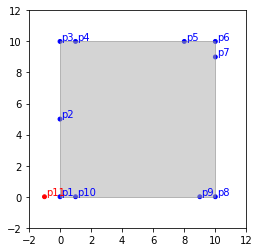

In [7]:
_, ax = plt.subplots()
line1 = [ [p.x, p.y] for p in polygon2 ]
pg1 = plt.Polygon(line1, closed=True, fill=True, 
                  facecolor='#AAAAAA', edgecolor='grey', alpha=0.5)
ax.add_patch(pg1)

pts = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11]
results = [report01(pip_cross(p, polygon2)[0]) for p in pts]

colors = [['red', 'blue'][i] for i in results]
l2 = ax.scatter([p.x for p in pts], [p.y for p in pts], color=colors, s=15)
labels = ['p%s'%(i+1) for i in range(len(pts))]
for i, p in enumerate(pts):
    ax.text(p.x+0.1, p.y+0.1, labels[i], color=colors[i])

ax.set_aspect(1)
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 12)
plt.show()

Make it consistent

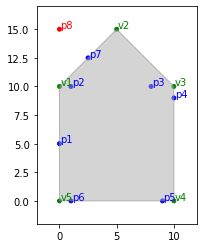

In [8]:
points2 = [ [0,10], [5, 15], [10,10], [10,0], [0,0], [0,10] ]
polygon2 = [ Point(p[0], p[1]) for p in points2 ]

other_points = [[0, 5], [1, 10], [8, 10], [10, 9], [9, 0], [1, 0], [2.5, 12.5], [0,15]]

_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in polygon2 ]
pg1 = plt.Polygon(line1, closed=True, fill=True, 
                  facecolor='#AAAAAA', edgecolor='grey', alpha=0.5)
ax.add_patch(pg1)

pts = [Point(p[0], p[1]) for p in other_points]
results = [report01(pip_cross(p, polygon2)[0]) for p in pts]

colors = [['red', 'blue'][i] for i in results]
l2 = plt.scatter([p.x for p in pts], [p.y for p in pts], color=colors, s=15)
labels = ['p%s'%(i+1) for i in range(len(pts))]
for i, p in enumerate(pts):
    plt.text(p.x+0.1, p.y+0.1, labels[i], color=colors[i])

pts = [Point(p[0], p[1]) for p in points2[:-1]]
results = [report01(pip_cross(p, polygon2)[0]) for p in pts]

colors = [['red', 'green'][i] for i in results]
l2 = plt.scatter([p.x for p in pts], [p.y for p in pts], color=colors, s=15)
labels = ['v%s'%(i+1) for i in range(len(pts))]
for i, p in enumerate(pts):
    plt.text(p.x+0.1, p.y+0.1, labels[i], color=colors[i])

    
ax.set_aspect(1)
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 17)
plt.show()

Here is an ultimate test where we set up a more complicated polygon and test a number of points around each of the vertices.

In [9]:
star = [ [2,1], [5,3], [8,1], [7,4], [9,7], [7,7], [5,11], [3,7], [1,7], [3,4], [2,1] ]
star = [ Point(p[0], p[1]) for p in star ]

delta = [-0.5, 0, 0.5]
near_points = []
for p in star:
    for dx in delta:
        for dy in delta:
            if not (dx == 0 and dy == 0):
                p0 = Point(p.x+dx, p.y+dy)
                near_points.append(p0)

Or equivelantly using list comprehension:

In [10]:
near_points = [Point(p.x+dx, p.y+dy) 
               for dx in delta 
               for dy in delta 
               for p in star 
               if not (dx==0 and dy==0)]

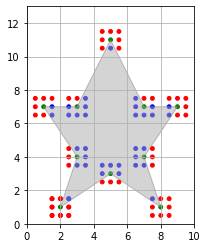

In [11]:
_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in star ]
pg1 = plt.Polygon(line1, closed=True, fill=True, facecolor='#AAAAAA', edgecolor='grey', alpha=0.5)
ax.add_patch(pg1)

results = [report01(pip_cross(p, star)[0]) for p in near_points]
colors = [['red', 'blue'][i] for i in results]
l2 = ax.scatter([p.x for p in near_points], [p.y for p in near_points], color=colors, s=15)

results = [report01(pip_cross(p, star)[0]) for p in star[:-1]]
colors = [['red', 'green'][i] for i in results]
l2 = ax.scatter([p.x for p in star[:-1]], [p.y for p in star[:-1]], color=colors, s=15)
    
ax.set_aspect(1)
ax.set_xlim(0, 10)
ax.set_ylim(0, 13)
ax.grid()
plt.show()

## Random points on the polygon

We are going to use what we have learned so far to do an experiment. First, let's make a triangle that has a minimal bounding box (envelope) defined as [0, 10, 0, 10], which are the lower bound and upper bound of x and y coordinates, respectively. Now we randomly generate 100 points and count how many points are within the triangle. What is the proportion of the points within the triangle? This should give us an estimate of the area of the triangle. But this is just one estimation. If we do this again, we would get a different answer. If we repeat this process 100 times, each time we have an estimate of the size of the triangle and we can plot a histogram that should tell us a lot about the size of the triangle. We can also draw the points with the triangle to get some kind of visual proof. This experiment can go on (for example, we can use 1000 points instead of 100) and the more we do the more we will learn some fundamental scientific concepts, such as computational geometry and Monte Carlo simulation. 


In [16]:
import random

triangle = [Point(p[0], p[1]) for p in [ [0, 0], [10,5], [5,10], [0,0] ]]

bounds = [[0,0], [10,0], [10,10], [0,10]]
points = [Point(random.random()*10, random.random()*10) for i in range(100)]

num_in = 0

report01 = lambda res: 1 if res is True else 0
results = [report01(pip_cross(p, triangle)[0]) for p in points]

# TODO: print out the area of the triangle
#       using the centroid function to calculate
from geom.centroid import *

print(centroid(triangle)[0])

37.5


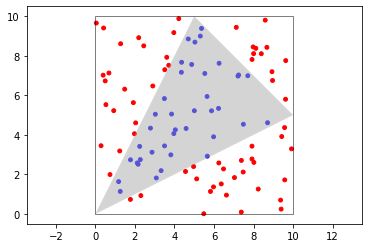

In [13]:
_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in triangle ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='#AAAAAA', edgecolor='none', alpha=0.5)
ax.add_patch(l1)

l1 = plt.Polygon(bounds, closed=True, fill=False, edgecolor='k', alpha=0.5)
ax.add_patch(l1)

colors = [['red', 'blue'][i] for i in results]
l3 = plt.scatter([p.x for p in points], [p.y for p in points], color=colors, s=15)

ax.axis('equal')
plt.show()

Now we repeat the this procedure 500 times. Each time will give us a measure of the points falling in the same triangle. This is called Monte-Carlo simulation -- we do the same thing randomly, a lot, and hope at the end we can learn something about that is more likely to happen. 

In [14]:
def count_in_triangle(points, triangle):
    results = [report01(pip_cross(p, triangle)[0]) for p in points]
    return sum(results)

counts = []
for i in range(500):
    points = [Point(random.random()*10, random.random()*10) for i in range(100)]
    counts.append(count_in_triangle(points, triangle))

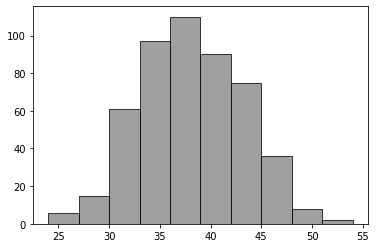

In [15]:
ax = plt.gca()
ax.hist(counts, 10, facecolor='grey', edgecolor='black', alpha=0.75)
plt.show()